# Лабораторна №1
### Лінійна регресія
ФІ-21, Голуб Михайло

### Набір даних
Обрано набір даних *Public transport traffic data in France*

In [151]:
%pip install kagglehub[pandas-datasets]
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install statsmodels
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("mustafamaher2520/student-performance-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\misha\.cache\kagglehub\datasets\mustafamaher2520\student-performance-data\versions\1


In [153]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (16, 10)

df = pd.read_csv(path+"\SrudentPerformanceScore.csv")
df.head(5)

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\misha\AppData\Local\Temp\ipykernel_31444\4246481028.py:12: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv(path+"\SrudentPerformanceScore.csv")


,Student_ID,Performance_Score,Sleep_Hours,Stress_Level,Previous_Exam_Scores,Study_Hours
0,110,28.7,4.4,6.4,87.2,4.3
1,111,33.5,7.5,5.8,72.1,3.9
2,112,40.5,8.7,4.0,62.2,3.8
3,113,44.8,6.6,1.0,80.8,4.7
4,114,36.8,8.5,4.6,53.2,7.2


# Підготовчий етап

### Опис датасету:

This dataset contains detailed records of students with their academic performance rated out of 100. It includes various factors that can influence student outcomes such as average sleep hours per night, self-reported stress levels on a scale from 1 to 10, previous exam scores, and daily study hours. Each student is uniquely identified by a Student ID.

The dataset is designed to facilitate exploratory data analysis, predictive modeling, and multiple regression analysis to understand how sleep patterns, stress, study habits, and past academic performance collectively affect current performance. It also supports thorough assumption testing including linearity, homoscedasticity, normality, independence, and multicollinearity checks.

This data is generated with realistic ranges and distributions to simulate real student behaviors and academic results, making it ideal for educational research and machine learning projects focusing on student success factors.

Columns Description:
Student_ID: Unique identifier for each student
Performance_Score: Academic performance score (0–100)
Sleep_Hours: Average hours slept per night
Stress_Level: Self-reported stress level (1 very low to 10 very high)
Previous_Exam_Scores: Past exam scores (0–100)
Study_Hours: Average daily study time in hours

### Аналіз датасету

In [154]:
print("rows:",len(df))
print("columns:",len(df.columns))
for column in df.columns:
    print(column, type(df[column][0]))
df.count()

rows: 322
columns: 6
Student_ID <class 'numpy.int64'>
Performance_Score <class 'numpy.float64'>
Sleep_Hours <class 'numpy.float64'>
Stress_Level <class 'numpy.float64'>
Previous_Exam_Scores <class 'numpy.float64'>
Study_Hours <class 'numpy.float64'>


Student_ID              322
Performance_Score       322
Sleep_Hours             322
Stress_Level            322
Previous_Exam_Scores    322
Study_Hours             322
dtype: int64

### Визначення вхідних та вихідних параметрів

Student_ID не є параметром

Performance_Score є вихідним параметром

Усі інші параметри -- вхідні

In [155]:
df = df.drop(["Student_ID"], axis = 1)

### Візуалізація кореляцій параметрів

C:\Users\misha\AppData\Local\Temp\ipykernel_31444\2211978679.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


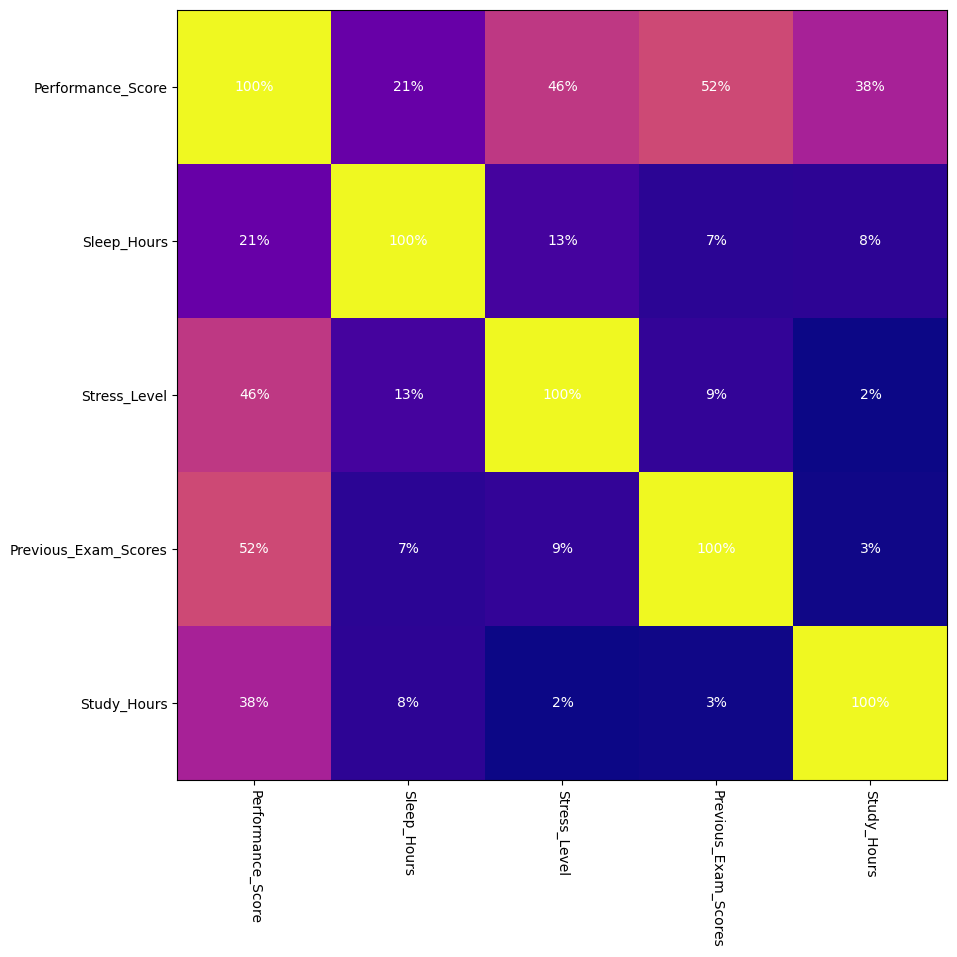

In [156]:


inputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
outputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]

fig, ax = plt.subplots()

corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])

ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

Вхідні параметри між собою мало корельовані, а вихідний параметр слабо корельований з часом сну та не сильно корельований з іншими параметрами

C:\Users\misha\AppData\Local\Temp\ipykernel_31444\803226120.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",


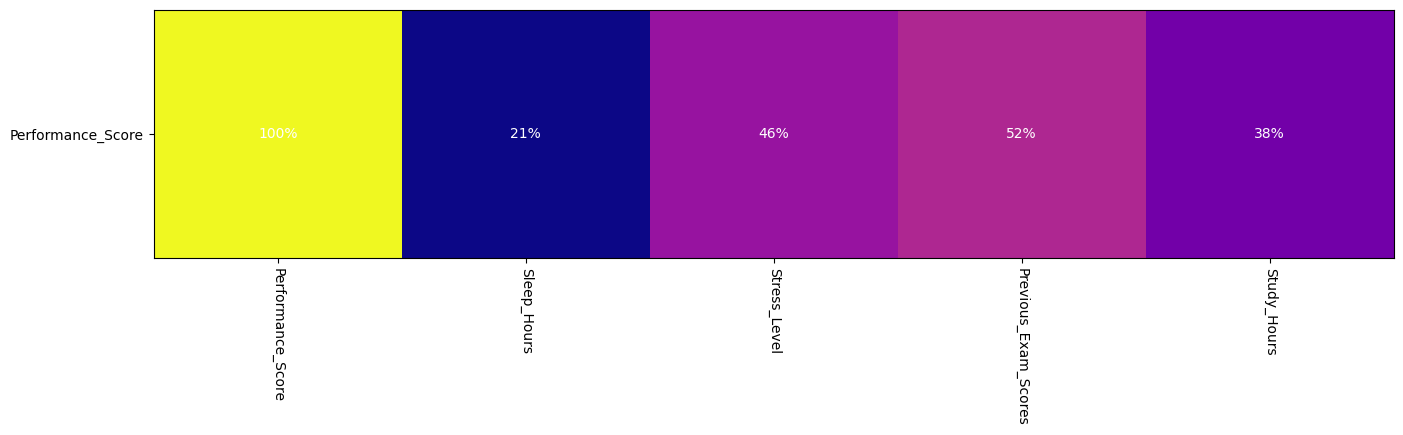

In [157]:
inputs = ["Performance_Score"]
outputs = ["Performance_Score",
        "Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
fig, ax = plt.subplots()
corr = pd.DataFrame()
for a in inputs:
    for b in outputs:
        corr.loc[a, b] = abs(df.corr().loc[a, b])



ax.imshow(corr, cmap='plasma', interpolation='nearest')
plt.yticks(ticks = range(len(inputs)),labels = inputs)
plt.xticks(ticks = range(len(outputs)),labels = outputs, rotation=-90)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        text = ax.text(j, i, str(round(100*corr[corr.columns[j]][i]))+"%",
                       ha="center", va="center", color="w")

Text(0.5, 0, 'Study_Hours')

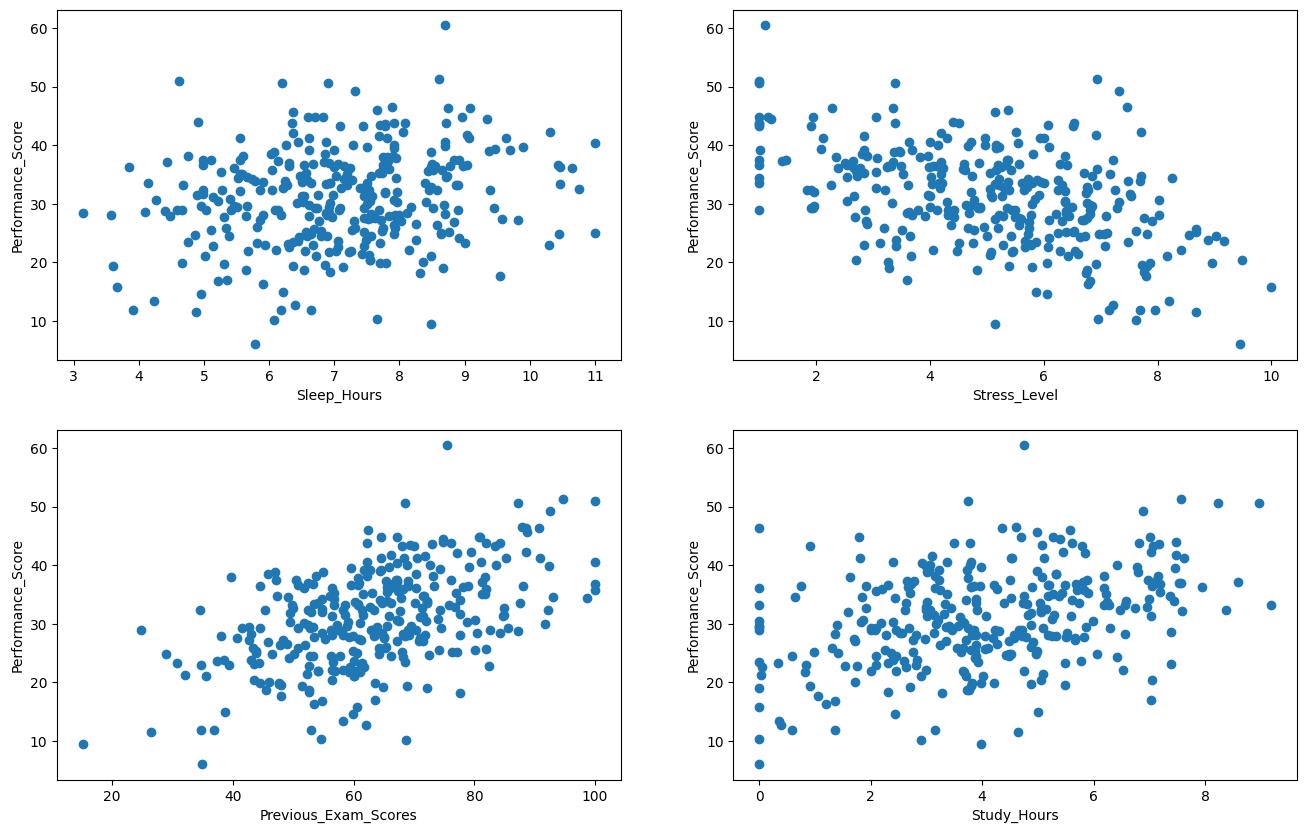

In [158]:
plt.subplot(221)
plt.scatter(df["Sleep_Hours"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Sleep_Hours")

plt.subplot(222)
plt.scatter(df["Stress_Level"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Stress_Level")

plt.subplot(223)
plt.scatter(df["Previous_Exam_Scores"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Previous_Exam_Scores")

plt.subplot(224)
plt.scatter(df["Study_Hours"], df["Performance_Score"])
plt.ylabel("Performance_Score")
plt.xlabel("Study_Hours")

Розбиття на навчальний та тестовий датасети:

In [159]:
df_train = df[:int(len(df)*0.7)]
df_test = df[int(len(df)*0.7):]

### Блок 0. Звичайна регресія

Sleep_Hours: slope=1.011, intercept=23.411
Stress_Level: slope=-1.964, intercept=40.717
Previous_Exam_Scores: slope=0.303, intercept=11.278
Study_Hours: slope=1.670, intercept=23.903


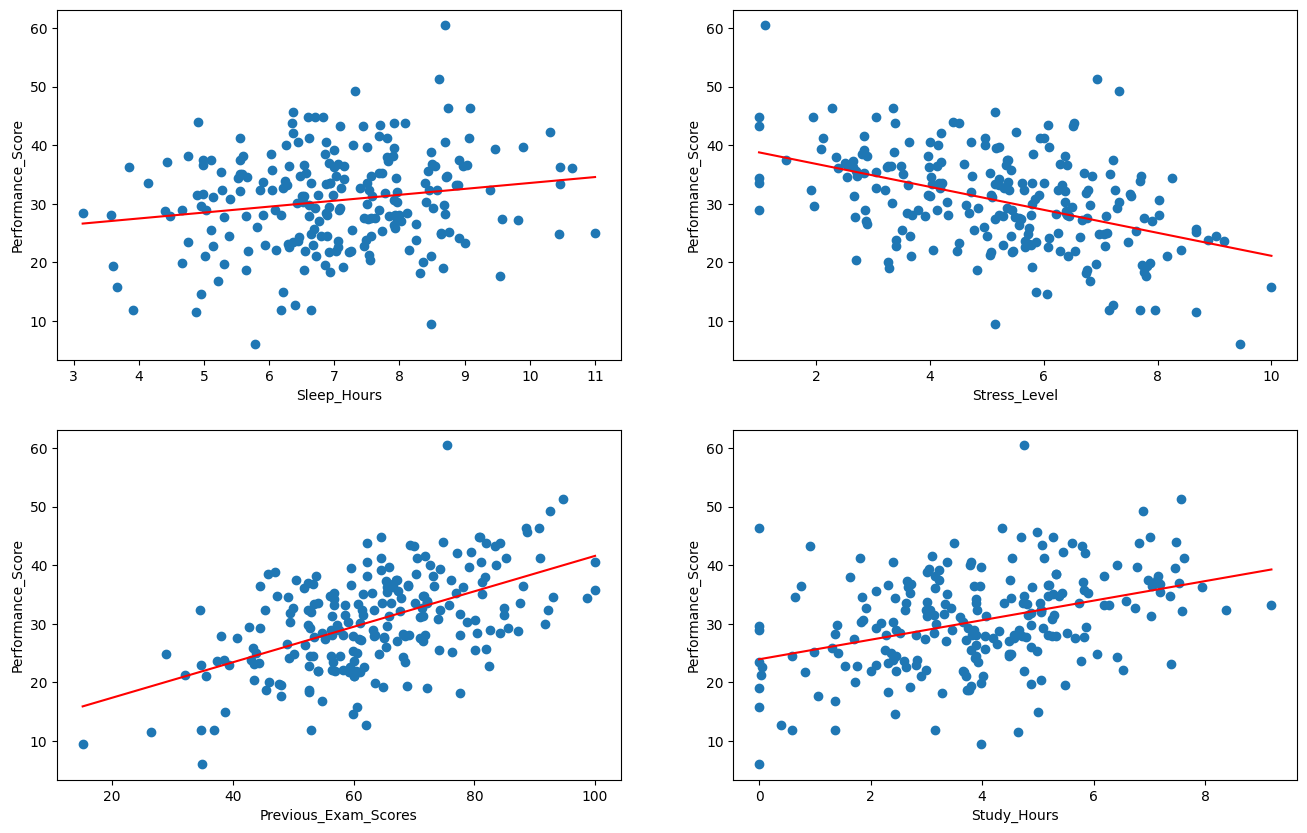

In [160]:
#X_matrix = df.drop("Performance_Score", axis = 1).to_numpy()
names = ["Sleep_Hours", 
        "Stress_Level", 
        "Previous_Exam_Scores",
        "Study_Hours"]
for name in names:
    X = df_train[name].to_numpy()
    Y = df_train["Performance_Score"].to_numpy()

    # compute slope & intercept directly
    b1 = np.cov(X, Y, bias=True)[0,1] / np.var(X)
    b0 = np.mean(Y) - b1 * np.mean(X)

    print(f"{name}: slope={b1:.3f}, intercept={b0:.3f}")

    # regression line
    regdots_x = [np.min(X), np.max(X)]
    regdots_y = [b0 + b1 * np.min(X), b0 + b1 * np.max(X)]

    plt.subplot(221 + names.index(name))
    plt.scatter(X, Y)
    plt.plot(regdots_x, regdots_y, c="r")
    plt.ylabel("Performance_Score")
    plt.xlabel(name)

[ 1.62647947 -1.45590406  0.3140176   1.70013074]


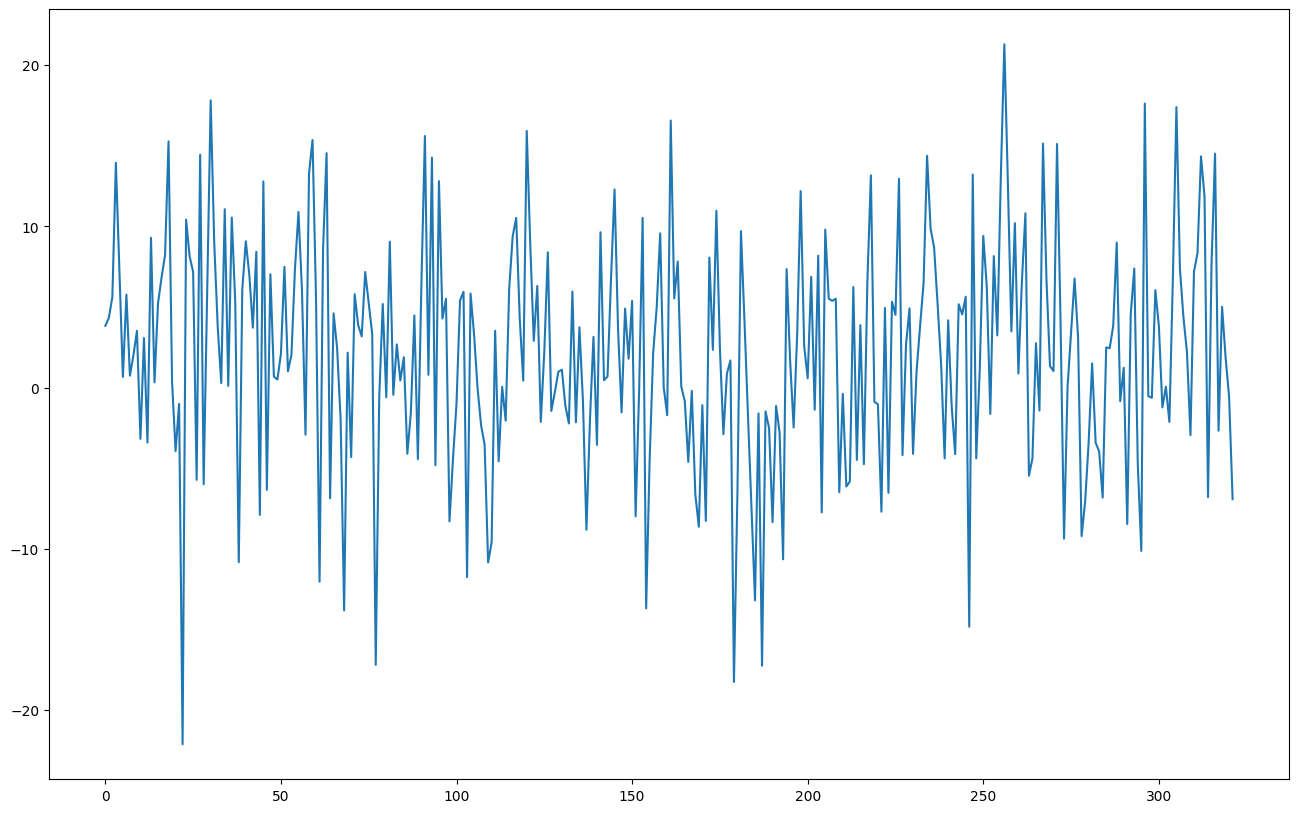

In [161]:
X_matrix = df.drop("Performance_Score", axis = 1).to_numpy()
Y_matrix = df["Performance_Score"].to_numpy()

X_t = np.transpose(X_matrix)
B_matrix = np.matmul(np.matmul(np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1), X_t), Y_matrix)

y_pred = np.sum(B_matrix*X_matrix, axis = 1)
residuals = y_pred - Y_matrix[0]

MSE = np.sum(np.power(residuals, 2))/(X_matrix.shape[0] - X_matrix.shape[1] - 1)
sigma_hat = np.sqrt(MSE)

print(B_matrix)

plt.plot(residuals)

322 322


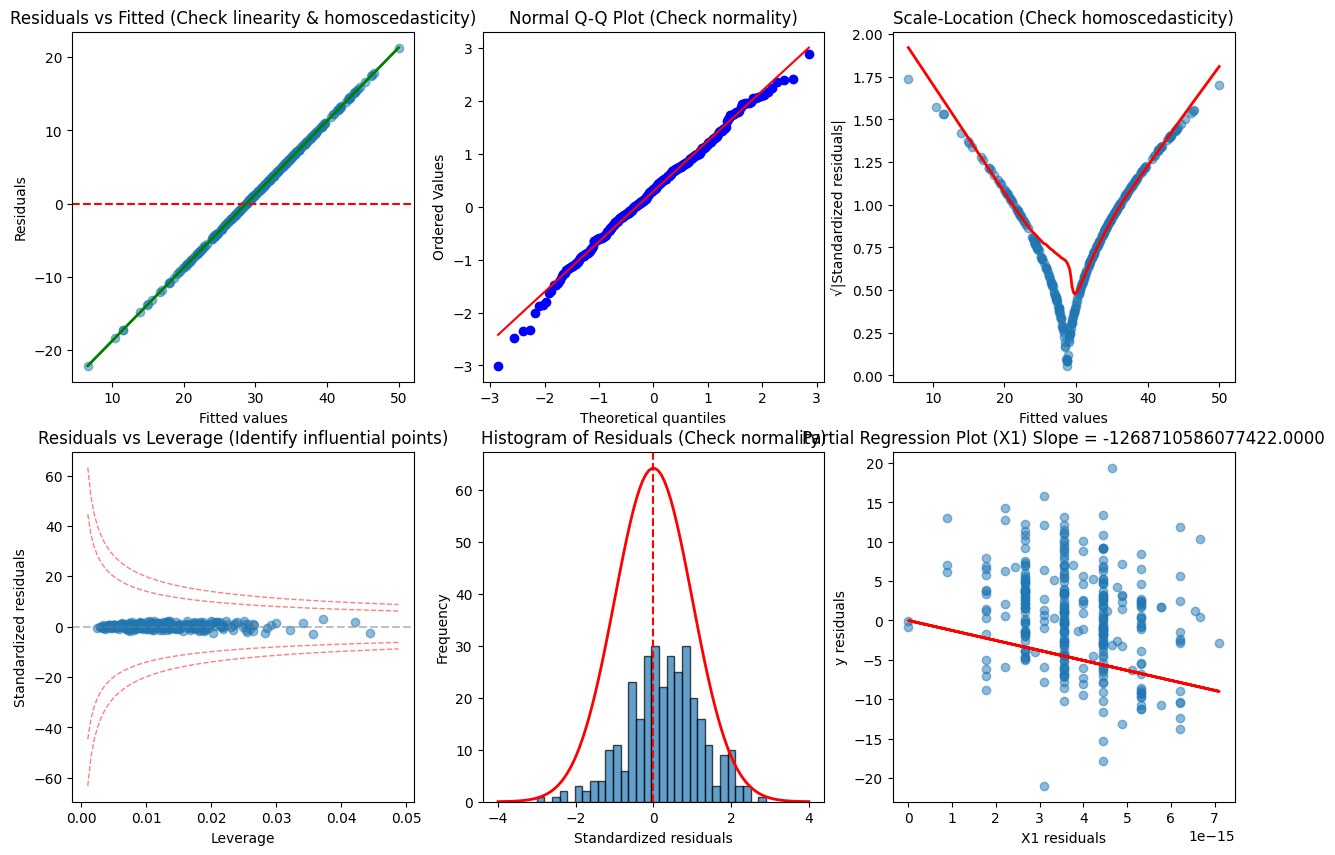


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9942, p-value = 0.2612
Jarque-Bera test: JB = 4.3106, p-value = 0.1159
Condition number: 35.89
VIF values: ['12.31', '6.26', '12.58', '4.67']
Mean VIF: 8.96
Durbin-Watson statistic: 1.6836 (2.0 = no autocorrelation)


In [162]:
# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
print(len(leverage), len(standardized_residuals))
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2, 3]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 1], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

#plt.tight_layout()
plt.show()

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")
"""
# RESET test for functional form
from statsmodels.stats.diagnostic import linear_reset
reset_result = linear_reset(model_sm, power=3, test_type='fitted')
reset_stat = reset_result.statistic
reset_pvalue = reset_result.pvalue
print(f"RESET test: F = {reset_stat:.4f}, p-value = {reset_pvalue:.4f}")
"""
# Durbin-Watson test for autocorrelation (useful for time series)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.4f} (2.0 = no autocorrelation)")
"""
# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals, X_matrix)
print(f"Breusch-Pagan test: LM = {bp_stat:.4f}, p-value = {bp_pvalue:.4f}")

# White's test for heteroscedasticity
from statsmodels.stats.diagnostic import het_white
white_stat, white_pvalue, _, _ = het_white(residuals, X_matrix)
print(f"White's test: LM = {white_stat:.4f}, p-value = {white_pvalue:.4f}")
"""
pass

* За тестами Шапіро-Вілка та Жарка-Бера P > 0.05, отже залишки (residuals) можна вважати нормально розподіленими
* За показником мультиколінеарності 35.89 > 30 присутня значна мультиколінеарність
* За VIF перша та третя колонки мають серйозну мультиколінеарність, а друга може бути проблемною. За середнім VIF -- присутня значна мультиколінеарність.
* За статистикою Дурбіна-Ватсона може бути присутня слабка позитивна автокореляція 1.68 < 2

Отже, необхідно прибрати один з входів, для зменшення мультиколінеарності, нехай це буде третій вхід -- Previous_Exam_Scores

[ 3.40993964 -0.72302253  2.43936523]
322 322


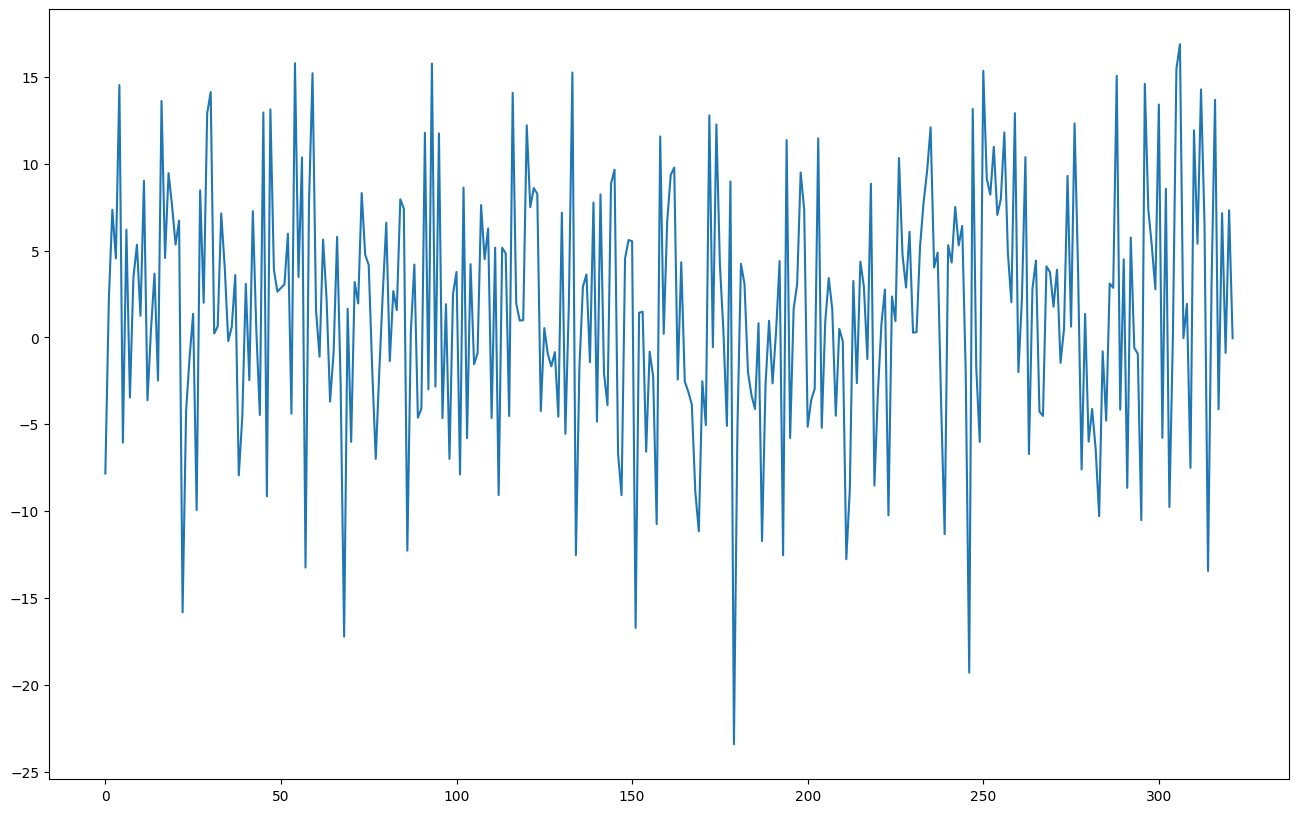

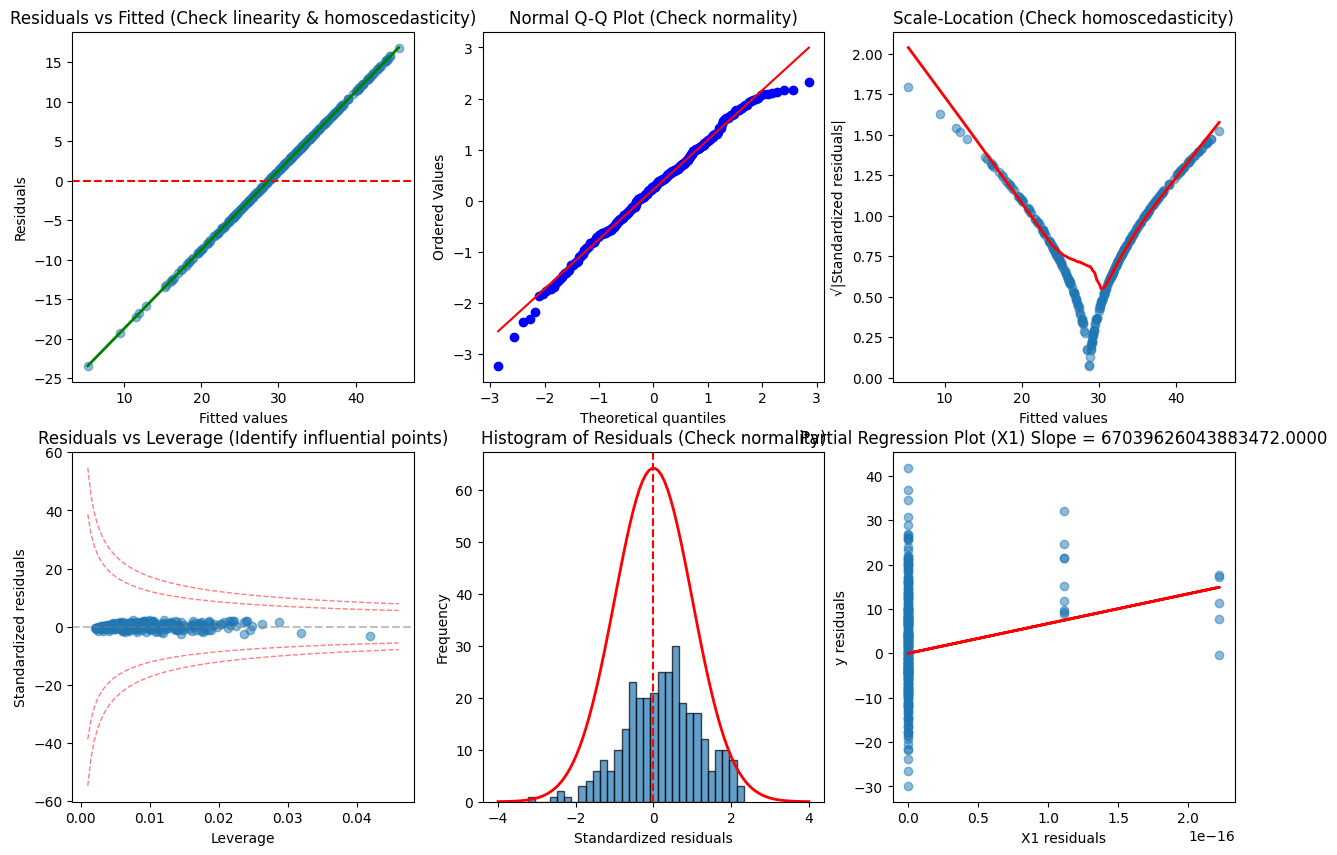


DIAGNOSTIC STATISTICS
Shapiro-Wilk test: W = 0.9914, p-value = 0.0575
Jarque-Bera test: JB = 4.2924, p-value = 0.1169
Condition number: 5.22
VIF values: ['7.28', '5.78', '4.34']
Mean VIF: 5.80
Durbin-Watson statistic: 2.0262 (2.0 = no autocorrelation)


In [163]:
X_matrix = df.drop(["Performance_Score","Previous_Exam_Scores"], axis = 1).to_numpy()
Y_matrix = df["Performance_Score"].to_numpy()

X_t = np.transpose(X_matrix)
B_matrix = np.matmul(np.matmul(np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1), X_t), Y_matrix)

y_pred = np.sum(B_matrix*X_matrix, axis = 1)
residuals = y_pred - Y_matrix[0]

MSE = np.sum(np.power(residuals, 2))/(X_matrix.shape[0] - X_matrix.shape[1] - 1)
sigma_hat = np.sqrt(MSE)

print(B_matrix)

plt.plot(residuals)

# Create comprehensive diagnostic plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check linearity & homoscedasticity)')

# Add lowess smoothing line

lowess_result = lowess(residuals, y_pred, frac=0.6)
axes[0, 0].plot(lowess_result[:, 0], lowess_result[:, 1], 'g-', linewidth=2)

# 2. Q-Q plot
standardized_residuals = residuals / sigma_hat
stats.probplot(standardized_residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot (Check normality)')

# 3. Scale-Location (Spread-Location)
sqrt_abs_std_resid = np.sqrt(np.abs(standardized_residuals))
axes[0, 2].scatter(y_pred, sqrt_abs_std_resid, alpha=0.5)
lowess_sl = lowess(sqrt_abs_std_resid, y_pred, frac=0.6)
axes[0, 2].plot(lowess_sl[:, 0], lowess_sl[:, 1], 'r-', linewidth=2)
axes[0, 2].set_xlabel('Fitted values')
axes[0, 2].set_ylabel('√|Standardized residuals|')
axes[0, 2].set_title('Scale-Location (Check homoscedasticity)')

# 4. Residuals vs Leverage
# Calculate leverage (hat values)
H = np.matmul(np.matmul(X_matrix, np.linalg.matrix_power(np.matmul(X_t ,X_matrix), -1)), X_t)
leverage = np.diag(H)
print(len(leverage), len(standardized_residuals))
axes[1, 0].scatter(leverage, standardized_residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Leverage')
axes[1, 0].set_ylabel('Standardized residuals')
axes[1, 0].set_title('Residuals vs Leverage (Identify influential points)')

# Add Cook's distance contours
k = X_matrix.shape[1]

x_lev = np.linspace(0.001, max(leverage)*1.1, 100)
for cook_level in [0.5, 1.0]:
    y_cook_upper = np.sqrt(cook_level * k * (1 - x_lev) / x_lev)
    y_cook_lower = -y_cook_upper
    axes[1, 0].plot(x_lev, y_cook_upper, 'r--', alpha=0.5, linewidth=1)
    axes[1, 0].plot(x_lev, y_cook_lower, 'r--', alpha=0.5, linewidth=1)

# 5. Histogram of residuals
axes[1, 1].hist(standardized_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--')
x_norm = np.linspace(-4, 4, 100)
axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm) * len(residuals) * 0.5, 'r-', linewidth=2)
axes[1, 1].set_xlabel('Standardized residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Residuals (Check normality)')

# 6. Partial regression plots (for first predictor X1)
# Residuals of Y ~ X0(intercept) + X2 + X3
X_others = X_matrix[:, [1, 2]]  # Exclude X1 (column 1)
model_y_others = sm.OLS(Y_matrix, X_others).fit()
resid_y = model_y_others.resid

# Residuals of X1 ~ X0(intercept) + X2 + X3
model_x1_others = sm.OLS(X_matrix[:, 1], X_others).fit()
resid_x1 = model_x1_others.resid

axes[1, 2].scatter(resid_x1, resid_y, alpha=0.5)
partial_slope = np.cov(resid_x1, resid_y)[0, 1] / np.var(resid_x1)
axes[1, 2].plot(resid_x1, partial_slope * resid_x1, 'r-', linewidth=2)
axes[1, 2].set_xlabel('X1 residuals')
axes[1, 2].set_ylabel('y residuals')
axes[1, 2].set_title(f'Partial Regression Plot (X1) Slope = {partial_slope:.4f}')

#plt.tight_layout()
plt.show()

# Additional diagnostic statistics
print("\n" + "="*60)
print("DIAGNOSTIC STATISTICS")
print("="*60)

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
print(f"Shapiro-Wilk test: W = {shapiro_stat:.4f}, p-value = {shapiro_pvalue:.4f}")

# Jarque-Bera test for normality
jb_stat, jb_pvalue = stats.jarque_bera(residuals)
print(f"Jarque-Bera test: JB = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")

# Condition number (multicollinearity indicator)
XtX = np.matmul(X_t, X_matrix)
eigenvalues = np.linalg.eigvals(XtX)
condition_number = np.sqrt(max(eigenvalues) / min(eigenvalues))
print(f"Condition number: {condition_number:.2f}")

# Mean VIF (only for predictors, not intercept)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_matrix, i) for i in range(0, k)] 
print(f"VIF values: {[f'{v:.2f}' for v in vif]}")
print(f"Mean VIF: {np.mean(vif):.2f}")
"""
# RESET test for functional form
from statsmodels.stats.diagnostic import linear_reset
reset_result = linear_reset(model_sm, power=3, test_type='fitted')
reset_stat = reset_result.statistic
reset_pvalue = reset_result.pvalue
print(f"RESET test: F = {reset_stat:.4f}, p-value = {reset_pvalue:.4f}")
"""
# Durbin-Watson test for autocorrelation (useful for time series)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.4f} (2.0 = no autocorrelation)")
"""
# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals, X_matrix)
print(f"Breusch-Pagan test: LM = {bp_stat:.4f}, p-value = {bp_pvalue:.4f}")

# White's test for heteroscedasticity
from statsmodels.stats.diagnostic import het_white
white_stat, white_pvalue, _, _ = het_white(residuals, X_matrix)
print(f"White's test: LM = {white_stat:.4f}, p-value = {white_pvalue:.4f}")
"""
pass